In [1]:
import sys
import os

# Add the root directory to sys.path
sys.path.append(os.path.abspath('..'))
import warnings
warnings.filterwarnings('ignore')

from scripts import exploration_customer_beahvior

In [2]:
path = ['../data/store.csv' , '../data/test.csv' , '../data/train.csv']
name = ['store' , 'test' , 'train']
data = exploration_customer_beahvior.load_data(path,name)

2024-09-20 18:22:09,742 - scripts.exploration_customer_beahvior - INFO - data loading started
2024-09-20 18:22:09,773 - scripts.exploration_customer_beahvior - DEBUG - the        Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
...     ...       ...        ...                  ...   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1   

In [3]:
store , test , train = data[0] , data[1] , data[2]


In [4]:
store['CompetitionOpenSinceMonth'].unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [5]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### more or less there is no outliers in this data set but have some missing values 

2024-09-20 18:22:10,911 - scripts.exploration_customer_beahvior - INFO - the missing values are going to be processed
2024-09-20 18:22:10,923 - scripts.exploration_customer_beahvior - DEBUG - the missing values Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64
2024-09-20 18:22:10,927 - scripts.exploration_customer_beahvior - DEBUG - here is the outliers boxplot for the data set
2024-09-20 18:22:10,950 - matplotlib.pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-09-20 18:22:10,955 - matplotlib.pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-09-20 18:22:10,956 - matplotlib.font_manager - DEBUG - findfont: 

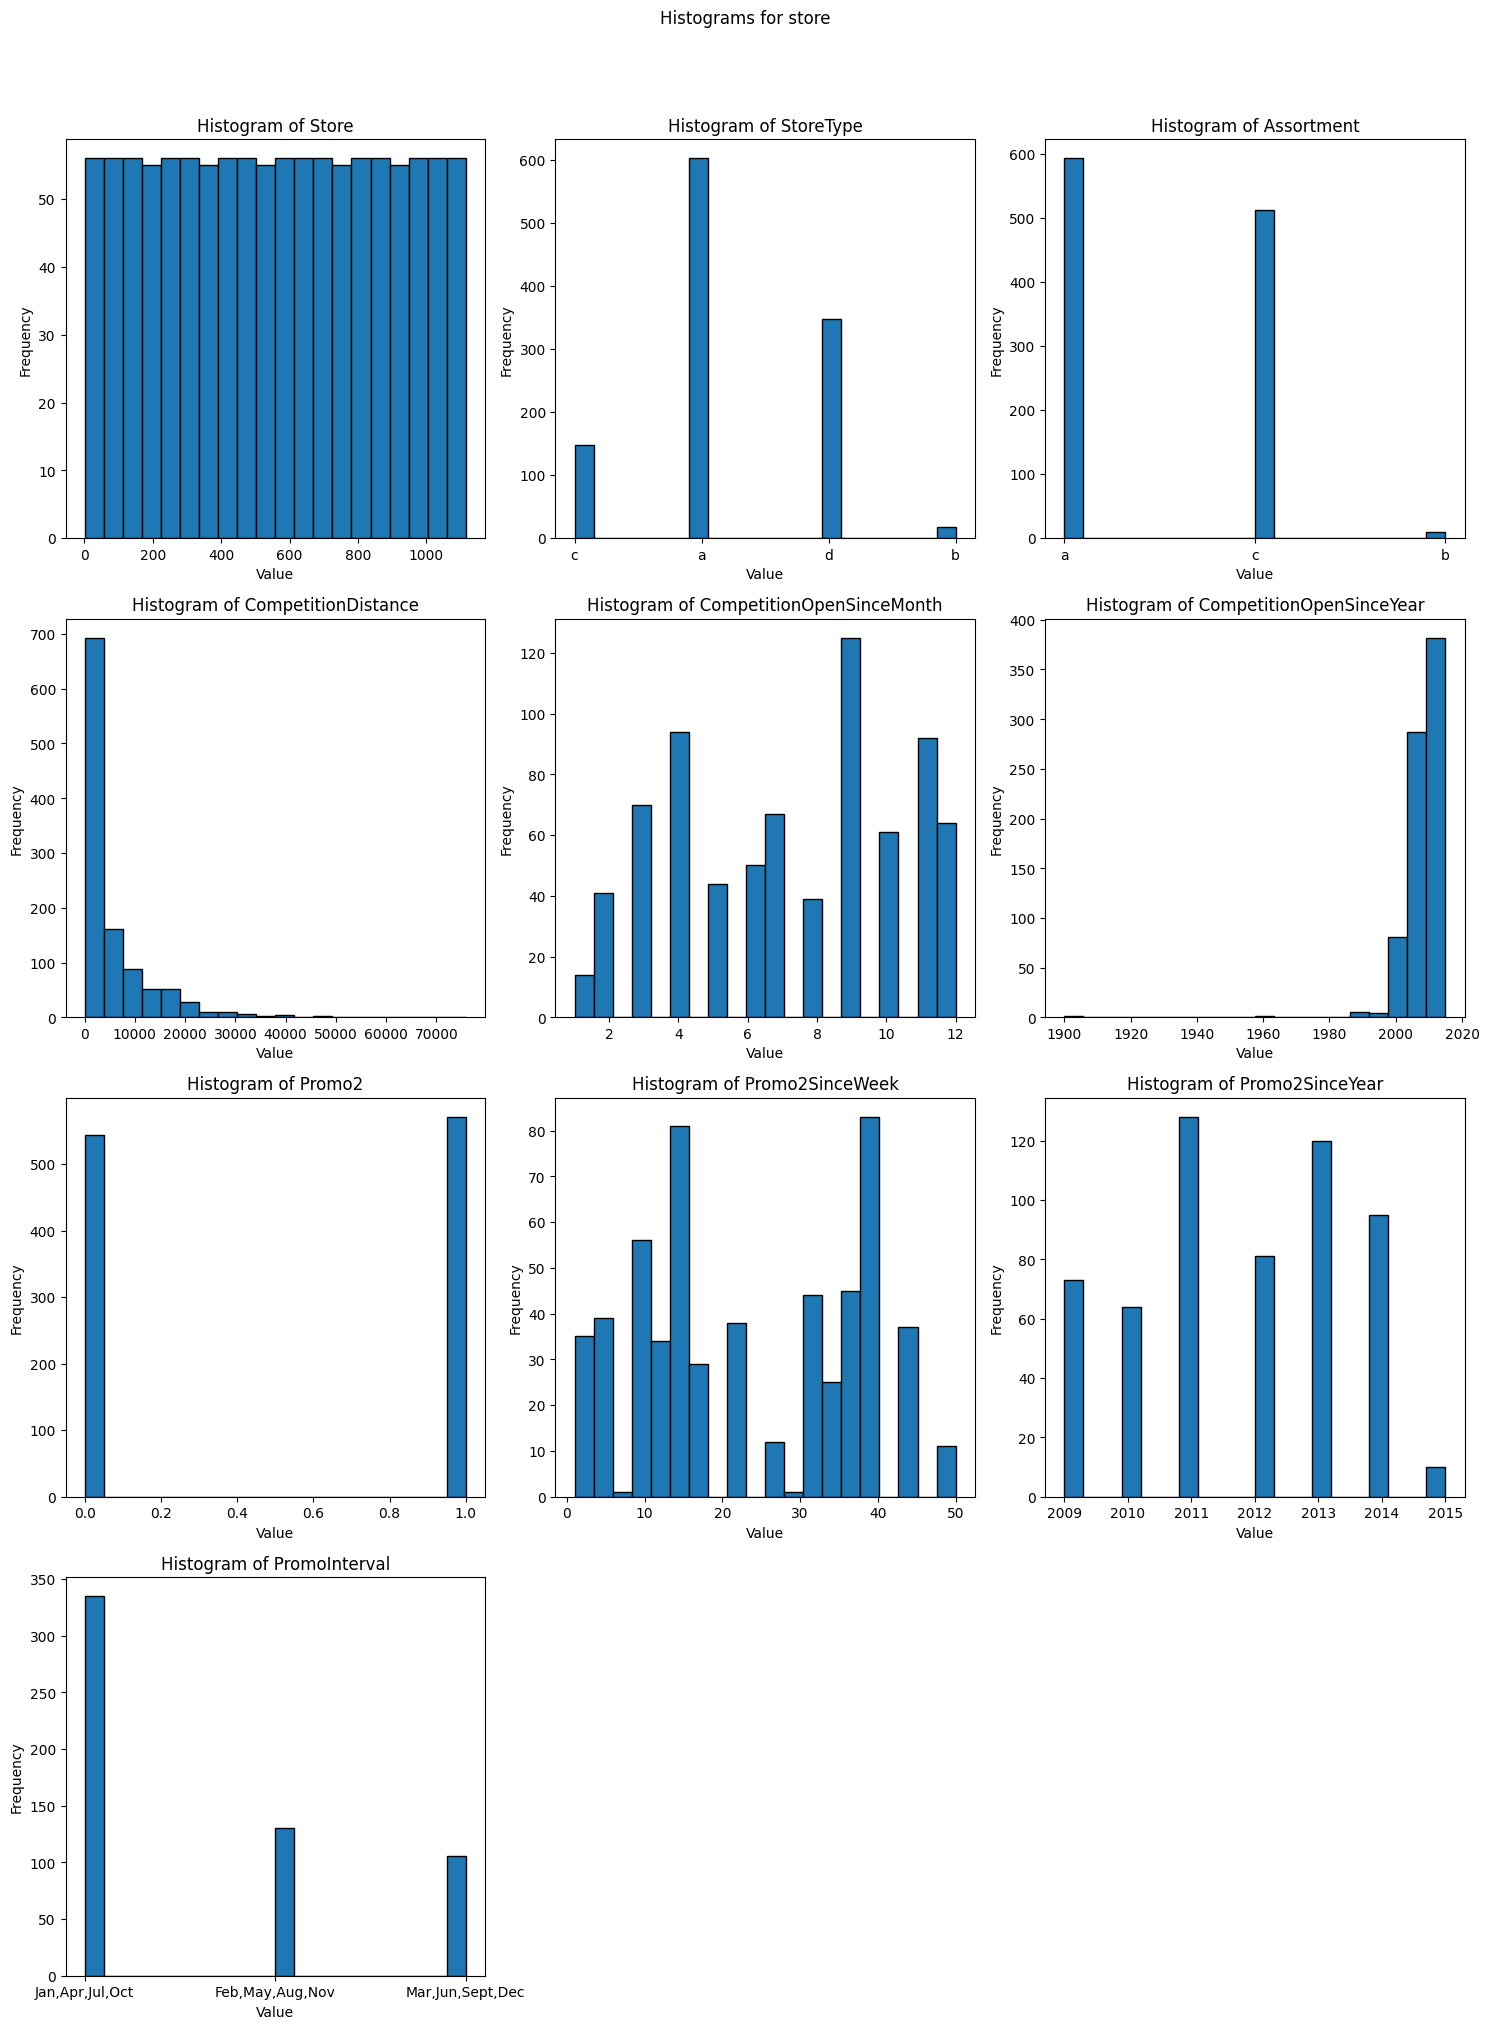

In [6]:
exploration_customer_beahvior.see_and_handle_missing_values_and_outliers(store , 'store')

## the train data have no missing value and as we can see from the plot there is also no outliers

In [7]:
train.head()

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,0,1,5,2015-07-31,5263,555,1,1,0,1
1,1,2,5,2015-07-31,6064,625,1,1,0,1
2,2,3,5,2015-07-31,8314,821,1,1,0,1
3,3,4,5,2015-07-31,13995,1498,1,1,0,1
4,4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
train['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6])

2024-09-20 18:22:14,469 - scripts.exploration_customer_beahvior - INFO - the missing values are going to be processed
2024-09-20 18:22:14,613 - scripts.exploration_customer_beahvior - DEBUG - the missing values Unnamed: 0       0
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
2024-09-20 18:22:14,616 - scripts.exploration_customer_beahvior - DEBUG - here is the outliers boxplot for the data set
2024-09-20 18:22:15,656 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 18:22:15,801 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate dat

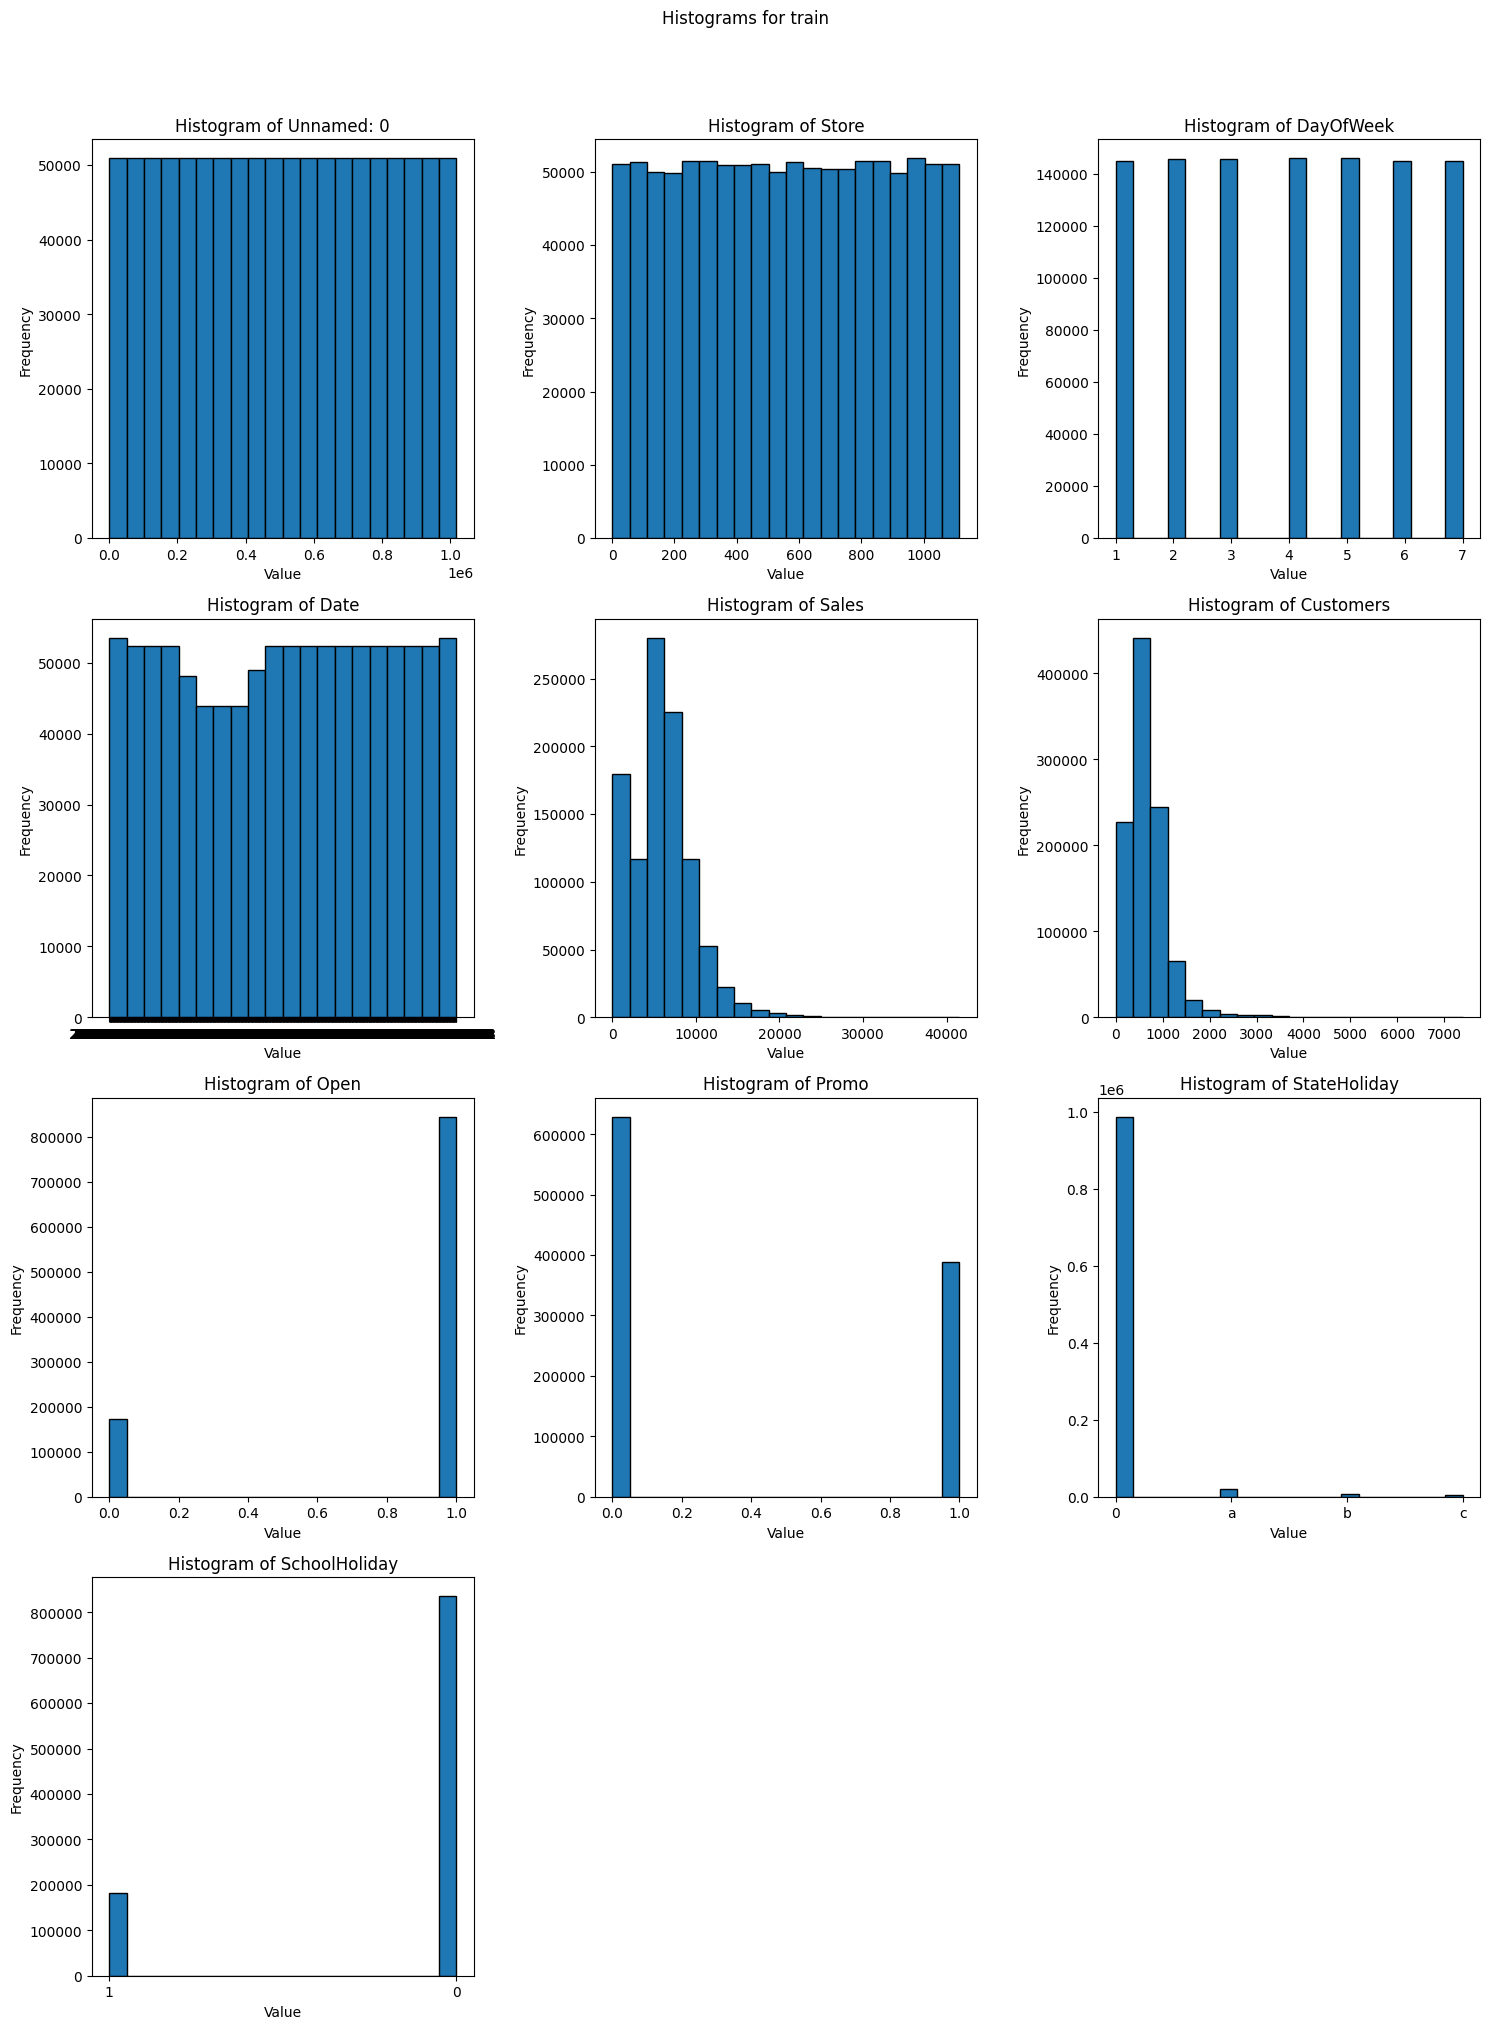

In [9]:
exploration_customer_beahvior.see_and_handle_missing_values_and_outliers(train , 'train')

In [10]:
train['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [11]:
train['SchoolHoliday'].unique()

array(['1', '0'], dtype=object)

### so we need to edit the two same values '0' and 0  to '0' whcich was array(['0', 'a', 'b', 'c', 0], dtype=object)

In [12]:
exploration_customer_beahvior.edit_cstate_holiday_column(train)

2024-09-20 18:22:25,820 - scripts.exploration_customer_beahvior - INFO - making changing the train stateholiday columns from this ['0', 'a', 'b', 'c', 0] to this ['0', 'a', 'b', 'c', ]


,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,0,1,5,2015-07-31,5263,555,1,1,0,1
1,1,2,5,2015-07-31,6064,625,1,1,0,1
2,2,3,5,2015-07-31,8314,821,1,1,0,1
3,3,4,5,2015-07-31,13995,1498,1,1,0,1
4,4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1017204,1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [13]:
train['StateHoliday'].unique()

array([0, 'a', 'b', 'c'], dtype=object)

## in the train data also there is no outliers and much missing values

In [14]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


2024-09-20 18:22:25,992 - scripts.exploration_customer_beahvior - INFO - the missing values are going to be processed
2024-09-20 18:22:26,003 - scripts.exploration_customer_beahvior - DEBUG - the missing values Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64
2024-09-20 18:22:26,005 - scripts.exploration_customer_beahvior - DEBUG - here is the outliers boxplot for the data set
2024-09-20 18:22:26,269 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 18:22:26,285 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


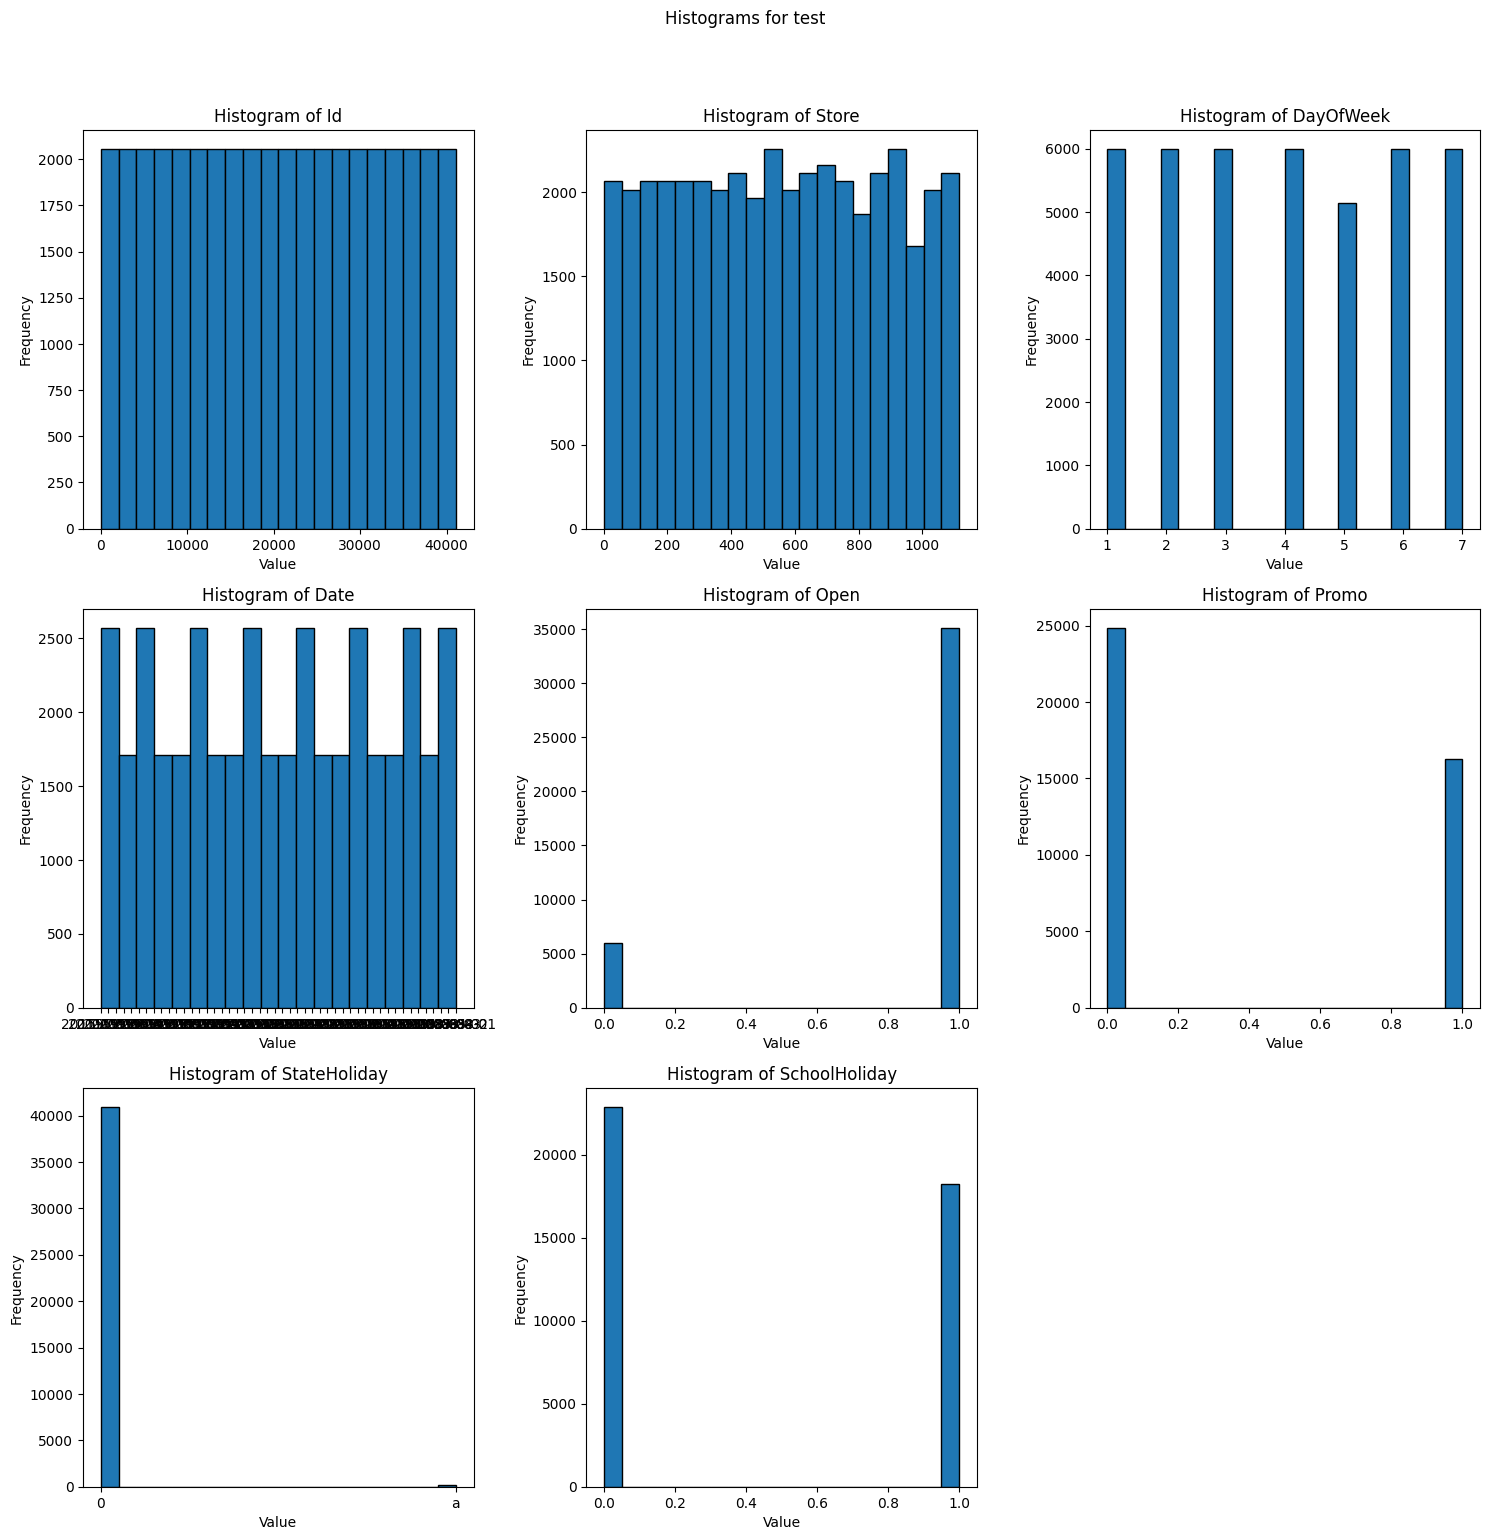

In [15]:
exploration_customer_beahvior.see_and_handle_missing_values_and_outliers(test , 'test')